<a href="https://colab.research.google.com/github/JeffPeC/Data_Science/blob/main/Challenge_DS_JP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
suma_precios = tienda['Precio'].sum()
print(f" La suma de la columna precios de la tienda1 es: {suma_precios}")

 La suma de la columna precios de la tienda1 es: 1150880400.0


In [ ]:
# para guiarme del monto total de cada tienda

suma_precios = tienda['Precio'].sum()
print(f" El ingreso total de la tienda 1 es: {suma_precios}")
suma_precios = tienda2['Precio'].sum()
print(f" El ingreso total de la tienda 2 es: {suma_precios}")
suma_precios = tienda3['Precio'].sum()
print(f" El ingreso total de la tienda 3 es: {suma_precios}")
suma_precios = tienda4['Precio'].sum()
print(f" El ingreso total de la tienda 4 es: {suma_precios}")



 El ingreso total de la tienda 1 es: 1150880400.0
 El ingreso total de la tienda 2 es: 1116343500.0
 El ingreso total de la tienda 3 es: 1098019600.0
 El ingreso total de la tienda 4 es: 1038375700.0


In [ ]:
# simplificando el codigo
tienda1 = pd.read_csv(url)
tiendas = [tienda1, tienda2, tienda3, tienda4]

for i, tienda in enumerate(tiendas, start=1):
    suma_precios = "{:,}".format(round(tienda['Precio'].sum()))
    print(f"El ingreso total de la tienda {i} es: {suma_precios}".replace(',', '.'))

El ingreso total de la tienda 1 es: 1.150.880.400
El ingreso total de la tienda 2 es: 1.116.343.500
El ingreso total de la tienda 3 es: 1.098.019.600
El ingreso total de la tienda 4 es: 1.038.375.700


# 2. Ventas por categoría

In [22]:
#validando la ejecucion del calculo de forma individual
tienda1 = pd.read_csv(url)

ProdXCategoría = tienda1.groupby('Categoría del Producto')['Producto'].count()
#para ver todas las categorias
print (ProdXCategoría)


Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
Name: Producto, dtype: int64


In [ ]:
# automatizando el codigo
tienda1 = pd.read_csv(url)
tiendas = [tienda1, tienda2, tienda3, tienda4]

for i, tienda in enumerate(tiendas, start=1):
    conteo_categoria = {}
    categoria1 = tienda.groupby('Categoría del Producto')['Producto'].count()
    conteo_categoria = tienda.groupby('Categoría del Producto')['Producto'].count().reset_index()
    cantidadmax = conteo_categoria['Producto'].max()


    print(f"La cantidad de productos vendidos por categoría en la tienda {i} es:")
    print(conteo_categoria.sort_values(by='Categoría del Producto'))
    print (f"Basado en los datos, la categoria {categoria1.idxmax()} tiene un total de {cantidadmax} productos vendidos en la tienda {i}")
    print("\n")

La cantidad de productos vendidos por categoría en la tienda 1 es:
    Categoría del Producto  Producto
0  Artículos para el hogar       171
1     Deportes y diversión       284
2        Electrodomésticos       312
3             Electrónicos       448
4   Instrumentos musicales       182
5                 Juguetes       324
6                   Libros       173
7                  Muebles       465
Basado en los datos, la categoria Muebles tiene un total de 465 productos vendidos en la tienda 1


La cantidad de productos vendidos por categoría en la tienda 2 es:
    Categoría del Producto  Producto
0  Artículos para el hogar       181
1     Deportes y diversión       275
2        Electrodomésticos       305
3             Electrónicos       422
4   Instrumentos musicales       224
5                 Juguetes       313
6                   Libros       197
7                  Muebles       442
Basado en los datos, la categoria Muebles tiene un total de 442 productos vendidos en la tienda 2




# 3. Calificación promedio de la tienda


In [ ]:
#validando la ejecucion del calculo de forma individual
tienda1 = pd.read_csv(url)
calificacion = tienda1.groupby('Producto')['Calificación'].count()
#se obtiene la clasificacion de los productos
print(calificacion)


Producto
Ajedrez de madera              49
Armario                        60
Asistente virtual              40
Auriculares                    50
Auriculares con micrófono      33
Balón de baloncesto            55
Balón de voleibol              42
Batería                        53
Bicicleta                      54
Bloques de construcción        56
Cama box                       44
Cama king                      44
Carrito de control remoto      52
Celular ABXY                   33
Ciencia de datos con Python    39
Cubertería                     52
Cubo mágico 8x8                44
Cuerda para saltar             40
Dashboards con Power BI        42
Dinosaurio Rex                 40
Estufa                         45
Guitarra acústica              46
Guitarra eléctrica             47
Impresora                      54
Iniciando en programación      41
Iphone 15                      49
Juego de mesa                  43
Kit de bancas                  44
Lavadora de ropa               47
Lavav

In [ ]:
#validando la ejecucion del calculo de forma individual
tienda1 = pd.read_csv(url)
Agrupar = pd.DataFrame(tienda1)


# Se agrupan y se cuentan los productos por clasificacion y con unstack se dejan en 0 para armar el Data Frame
conteo_calificaciones = Agrupar.groupby('Producto')['Calificación'].value_counts().unstack(fill_value=0)
# Con Axis=1 se pide ordenar y visualizar el conteo de las calificaciones por columnas
total_calificaciones = conteo_calificaciones.sum(axis=1)

print("Cantidad de calificaciones por producto es la siguiente:")
print(conteo_calificaciones)
print("\nCantidad total de calificaciones por producto:")
print(total_calificaciones)




Cantidad de calificaciones por producto es la siguiente:
Calificación                  1  2   3   4   5
Producto                                      
Ajedrez de madera             1  2   3  12  31
Armario                      10  1   3  14  32
Asistente virtual             5  1   5   4  25
Auriculares                  11  2   6   6  25
Auriculares con micrófono     6  1   1   5  20
Balón de baloncesto           7  3   7  11  27
Balón de voleibol             3  5   4   4  26
Batería                       6  2   4   5  36
Bicicleta                     7  2   6  11  28
Bloques de construcción       7  2   4   9  34
Cama box                      5  2   1  11  25
Cama king                     9  0   3  12  20
Carrito de control remoto     3  4   5  11  29
Celular ABXY                  4  3   3   8  15
Ciencia de datos con Python   3  2   6   5  23
Cubertería                    4  2   4  10  32
Cubo mágico 8x8               5  1   3  12  23
Cuerda para saltar            9  0   5   9  17
Das

In [ ]:
#Ejecutando para todas las tiendas.
tienda1 = pd.read_csv(url)
Agrupar = pd.DataFrame(tienda1)

calificaciones_promedio = {}
# Calcular las calificaciones promedio de cada tienda
for i, tienda in enumerate(tiendas, start=1):
    promedio = tienda['Calificación'].mean()
    calificaciones_promedio[f'Tienda {i}'] = promedio
    print(f"Calificación promedio de la Tienda {i}: {promedio:.2f}")


#print("\nCalificaciones promedio por tienda:")
#for tienda, promedio in calificaciones_promedio.items():
#    print(f"{tienda}: {promedio:.2f}")

Calificación promedio de la Tienda 1: 3.98
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [ ]:
#haciendo calculos con 1 sola tienda

tienda1 = pd.read_csv(url)
Agrupar = pd.DataFrame(tienda1)


# Se agrupan y se cuentan los productos por clasificacion y con unstack se dejan en 0 para armar el Data Frame
# El proposito del DataFrame es en caso de que existan mas de 1 producto con la cantidad Maxima o Minima repetida poder mostrarlos
conteo_calificaciones = Agrupar.groupby('Producto')['Calificación'].value_counts().unstack(fill_value=0)
# Con Axis=1 se pide ordenar y visualizar el conteo de las calificaciones por columnas considerando que cada calificacion es una venta
total_ventas = conteo_calificaciones.sum(axis=1)
# Producto con mayor número de ventas
cantidadmax = total_ventas.max()
productos_mas_vendidos = total_ventas[total_ventas == cantidadmax]

# Producto con menor número de ventas
cantidadmin = total_ventas.min()
productos_menos_vendidos = total_ventas[total_ventas == cantidadmin]

print("\nCantidad total de ventas por producto:")
print(total_ventas)

print("\nProductos con mayor número de ventas:")
print(productos_mas_vendidos)

print("\nProductos con menor número de ventas:")
print(productos_menos_vendidos)


Cantidad total de ventas por producto:
Producto
Ajedrez de madera              49
Armario                        60
Asistente virtual              40
Auriculares                    50
Auriculares con micrófono      33
Balón de baloncesto            55
Balón de voleibol              42
Batería                        53
Bicicleta                      54
Bloques de construcción        56
Cama box                       44
Cama king                      44
Carrito de control remoto      52
Celular ABXY                   33
Ciencia de datos con Python    39
Cubertería                     52
Cubo mágico 8x8                44
Cuerda para saltar             40
Dashboards con Power BI        42
Dinosaurio Rex                 40
Estufa                         45
Guitarra acústica              46
Guitarra eléctrica             47
Impresora                      54
Iniciando en programación      41
Iphone 15                      49
Juego de mesa                  43
Kit de bancas                  44

In [ ]:
#aplicando para todas las tiendas
tienda1 = pd.read_csv(url)
tiendas = [tienda1, tienda2, tienda3, tienda4]


# Calcular las calificaciones promedio de cada tienda
for i, tienda in enumerate(tiendas, start=1):
  Agrupar = pd.DataFrame(tienda)
# Se agrupan y se cuentan los productos por clasificacion y con unstack se dejan en 0 para armar el Data Frame
  conteo_calificaciones = Agrupar.groupby('Producto')['Calificación'].value_counts().unstack(fill_value=0)
# Con Axis=1 se pide ordenar y visualizar el conteo de las calificaciones por columnas considerando que cada calificacion es una venta
  total_ventas = conteo_calificaciones.sum(axis=1)
# Producto con mayor número de ventas
  cantidadmax = total_ventas.max()
  productos_mas_vendidos = total_ventas[total_ventas == cantidadmax]
# Producto con menor número de ventas
  cantidadmin = total_ventas.min()
  productos_menos_vendidos = total_ventas[total_ventas == cantidadmin]

  #Aqui imprime el listado de ventas de todos los productos
  #print(f"\nCantidad total de ventas por producto para la tienda {i}:")
  #print(total_ventas)

  print(f"\nProductos con mayor número de ventas para la tienda {i}:")
  print(productos_mas_vendidos)

  print(f"\nProductos con menor número de ventas para la tienda {i}:")
  print(productos_menos_vendidos)
  print("\n----")


Productos con mayor número de ventas para la tienda 1:
Producto
Armario          60
Microondas       60
TV LED UHD 4K    60
dtype: int64

Productos con menor número de ventas para la tienda 1:
Producto
Auriculares con micrófono    33
Celular ABXY                 33
dtype: int64

----

Productos con mayor número de ventas para la tienda 2:
Producto
Iniciando en programación    65
dtype: int64

Productos con menor número de ventas para la tienda 2:
Producto
Juego de mesa    32
dtype: int64

----

Productos con mayor número de ventas para la tienda 3:
Producto
Kit de bancas    57
dtype: int64

Productos con menor número de ventas para la tienda 3:
Producto
Bloques de construcción    35
dtype: int64

----

Productos con mayor número de ventas para la tienda 4:
Producto
Cama box    62
dtype: int64

Productos con menor número de ventas para la tienda 4:
Producto
Guitarra eléctrica    33
dtype: int64

----


# 5. Envío promedio por tienda

In [ ]:
tienda1 = pd.read_csv(url)
tiendas = [tienda1, tienda2, tienda3, tienda4]

# Calcular el costo de envío promedio de cada tienda
for i, tienda in enumerate(tiendas, start=1):
    promedio = round(tienda['Costo de envío'].mean())

    print(f"Costo de envío promedio de la Tienda {i}: ${promedio}")


Costo de envío promedio de la Tienda 1: $26019
Costo de envío promedio de la Tienda 2: $25216
Costo de envío promedio de la Tienda 3: $24806
Costo de envío promedio de la Tienda 4: $23459


# Extras

---



# Resumiendo los datos por Tienda

In [ ]:
tienda1 = pd.read_csv(url)
tiendas = [tienda1, tienda2, tienda3, tienda4]
for i, tienda in enumerate(tiendas, start=1):
                                      #Seccion de Todos las consultas
  #1.-Analisis de Facturacion
  suma_precios = "{:,}".format(round(tienda['Precio'].sum()))

      #2.-Ventas por Categoria
  conteo_categoria = {}
  categoria1 = tienda.groupby('Categoría del Producto')['Producto'].count()
  conteo_categoria = tienda.groupby('Categoría del Producto')['Producto'].count().reset_index()
  cantidadmax = conteo_categoria['Producto'].max()

        #3.-Promedio por tienda
  promedio = tienda['Calificación'].mean()
  calificaciones_promedio[f'Tienda {i}'] = promedio

          #4.-Mas y menos vendido
  Agrupar = pd.DataFrame(tienda)
  conteo_calificaciones = Agrupar.groupby('Producto')['Calificación'].value_counts().unstack(fill_value=0)
  total_ventas = conteo_calificaciones.sum(axis=1)
  cantidadmax = total_ventas.max()
  productos_mas_vendidos = total_ventas[total_ventas == cantidadmax]
  cantidadmin = total_ventas.min()
  productos_menos_vendidos = total_ventas[total_ventas == cantidadmin]

            #5.-Promedio
  promedio = round(tienda['Costo de envío'].mean())

                                      #======Seccion de Resultados=====
  print(f"\u2193  Informacion Detallada para la tienda {i}:   \u2193")
  #1.-Analisis de Facturacion
  print(f"El ingreso total de la tienda  es: {suma_precios}".replace(',', '.'))
  print("\n")

      #2.-Ventas por Categoria
  print(f"La cantidad de productos vendidos por categoría es:")
  print(conteo_categoria.sort_values(by='Categoría del Producto'))
  print (f"Basado en los datos, la categoria {categoria1.idxmax()} tiene un total de {cantidadmax} productos vendidos")
  print("\n")

        #3.-Promedio por tienda
  print(f"Calificación promedio de la Tienda: {promedio:.2f}")
  print("\n")

          #4.-Mas y menos vendido
  print(f"Productos con mayor número de ventas:")
  print(productos_mas_vendidos)
  print(f"Productos con menor número de ventas:")
  print(productos_menos_vendidos)
  print("\n")

            #5.-Promedio
  print(f"Costo de envío promedio: ${promedio:.2f}")
  print(f"\u2191  Fin del Analisis de la Tienda {i}   \u2191")
  print("\n============================================")
  print("============================================\n")

↓  Informacion Detallada para la tienda 1:   ↓
El ingreso total de la tienda  es: 1.150.880.400


La cantidad de productos vendidos por categoría es:
    Categoría del Producto  Producto
0  Artículos para el hogar       171
1     Deportes y diversión       284
2        Electrodomésticos       312
3             Electrónicos       448
4   Instrumentos musicales       182
5                 Juguetes       324
6                   Libros       173
7                  Muebles       465
Basado en los datos, la categoria Muebles tiene un total de 60 productos vendidos


Calificación promedio de la Tienda: 26019.00


Productos con mayor número de ventas:
Producto
Armario          60
Microondas       60
TV LED UHD 4K    60
dtype: int64
Productos con menor número de ventas:
Producto
Auriculares con micrófono    33
Celular ABXY                 33
dtype: int64


Costo de envío promedio: $26019.00
↑  Fin del Analisis de la Tienda 1   ↑


↓  Informacion Detallada para la tienda 2:   ↓
El ingreso total 

# Representacion Grafica de los datos por Tienda

Para la siguiente representación se detallará lo numeros basados en las ventas generadas por tiendas.
 
La intención principal de poder ayudar al Sr Juan a tomar una desicion determinante de cual de las tiendas se debera vender para un nuevo proyecto de inversión.
 
Se tomado en consideracion los siguientes aspectos/características que determinan los ingresos por cada tienda Ingreso Neto, Categoria de Productos, Calificación, Productos, Promedio de Ingreso por envíos.


↓  Informacion Detallada para la tienda 1:   ↓
El ingreso total de la tienda  es: 1150880400


La cantidad de productos vendidos por categoría es:
    Categoría del Producto  Producto
0  Artículos para el hogar       171
1     Deportes y diversión       284
2        Electrodomésticos       312
3             Electrónicos       448
4   Instrumentos musicales       182
5                 Juguetes       324
6                   Libros       173
7                  Muebles       465
Basado en los datos, la categoria Artículos p

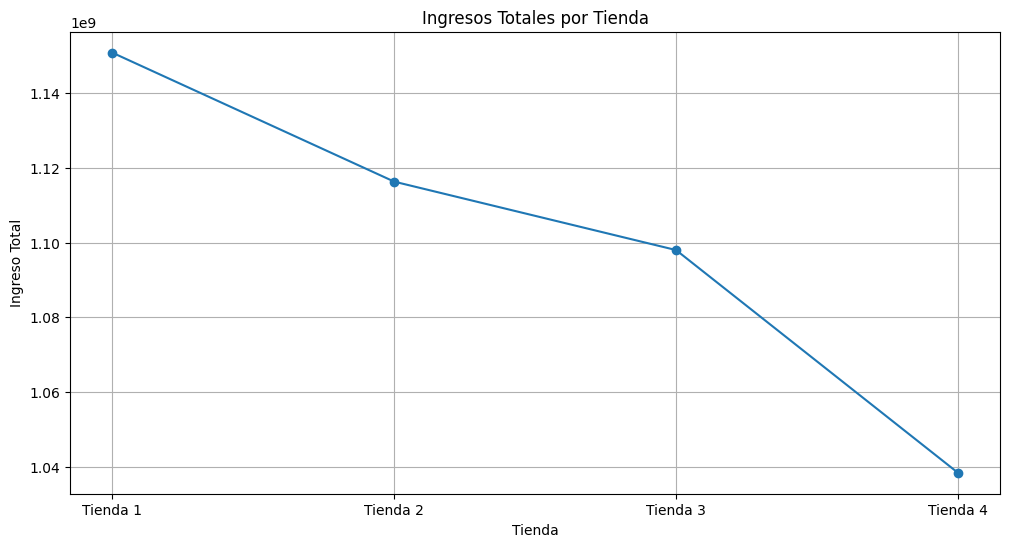


 De todas las tiendas la que posee un menor ingreso es la número 4 con un ingreso total de: 1.038.375.700.00



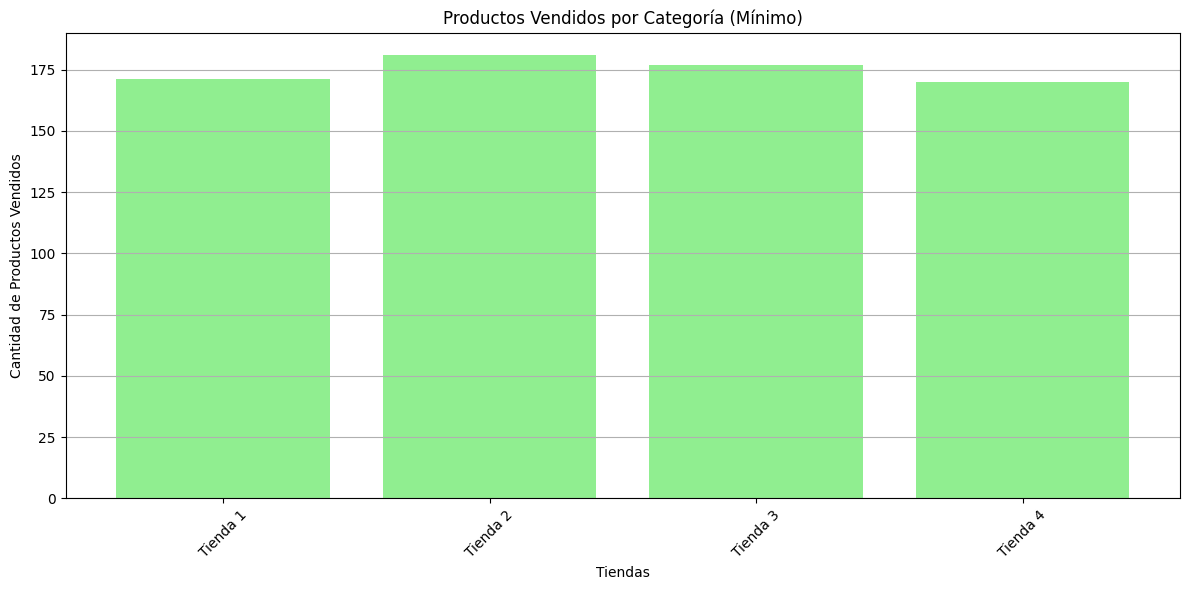


La categoria Instrumentos musicales que ha generado menor ingreso es en la tienda 4 obteniendo una cantidad de 170 productos vendidos

Por lo que el Señor Juan podria tomar en consideracion poder vender la Tienda 4, basados en los resultados que arrojan las estadísticas detalladas anteriormente.
 Considerando esta tienda la que menos ingresos representa en comparación a las otras 3


In [12]:
print ("Para la siguiente representación se detallará lo numeros basados en las ventas generadas por tiendas.\n \nLa intención principal de poder ayudar al Sr Juan a tomar una desicion determinante de cual de las tiendas se debera vender para un nuevo proyecto de inversión.\n \nSe tomado en consideracion los siguientes aspectos/características que determinan los ingresos por cada tienda Ingreso Neto, Categoria de Productos, Calificación, Productos, Promedio de Ingreso por envíos.\n\n===================================================================\n")

import matplotlib.pyplot as plt

tienda1 = pd.read_csv(url)
tiendas = [tienda1, tienda2, tienda3, tienda4]

calificaciones_promedio = {}
ingresos_totales = []
totalcategoriamax = []
totalcategoriamin = []



for i, tienda in enumerate(tiendas, start=1):
                                      #Seccion de Todos las consultas
  #1.-Analisis de Facturacion
  suma_precios = suma_precios = round(tienda['Precio'].sum())
  ingresos_totales.append(suma_precios)

      #2.-Ventas por Categoria
  conteo_categoria = {}
  categoria1 = tienda.groupby('Categoría del Producto')['Producto'].count()
  conteo_categoria = tienda.groupby('Categoría del Producto')['Producto'].count().reset_index()
  totalcantidadmax = conteo_categoria['Producto'].max()
  totalcategoriamax.append(totalcantidadmax)
  totalcantidadmin = conteo_categoria['Producto'].min()
  totalcategoriamin.append(totalcantidadmin)


        #3.-Promedio por tienda
  promedio = tienda['Calificación'].mean()
  calificaciones_promedio[f'Tienda {i}'] = promedio


          #4.-Mas y menos vendido
  Agrupar = pd.DataFrame(tienda)
  conteo_calificaciones = Agrupar.groupby('Producto')['Calificación'].value_counts().unstack(fill_value=0)
  total_ventas = conteo_calificaciones.sum(axis=1)
  cantidadmax = total_ventas.max()
  productos_mas_vendidos = total_ventas[total_ventas == cantidadmax]
  cantidadmin = total_ventas.min()
  productos_menos_vendidos = total_ventas[total_ventas == cantidadmin]


            #5.-Promedio
  promedio = round(tienda['Costo de envío'].mean())



                                      #======Seccion de Resultados=====
  print(f"\u2193  Informacion Detallada para la tienda {i}:   \u2193")
  #1.-Analisis de Facturacion
  print(f"El ingreso total de la tienda  es: {suma_precios}".replace(',', '.'))
  print("\n")

      #2.-Ventas por Categoria
  print(f"La cantidad de productos vendidos por categoría es:")
  print(conteo_categoria.sort_values(by='Categoría del Producto'))
  print (f"Basado en los datos, la categoria {categoria1.idxmin()} tiene un total de {totalcantidadmin} productos vendidos")
  print("\n")

        #3.-Promedio por tienda
  print(f"Calificación promedio de la Tienda: {promedio:.2f}")
  print("\n")

          #4.-Mas y menos vendido
  print(f"Productos con mayor número de ventas:")
  print(productos_mas_vendidos)
  print(f"Productos con menor número de ventas:")
  print(productos_menos_vendidos)
  print("\n")

            #5.-Promedio
  print(f"Costo de envío promedio: ${promedio:.2f}")
  print(f"\u2191  Fín del Análisis de la Tienda {i}   \u2191")
  print("\n============================================")
  print("============================================\n")
# Resumen de todas las tiendas

#==========Resumen con Graficos===========

# Gráfico de ingresos totales por tienda
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(ingresos_totales) + 1), ingresos_totales, marker='o', linestyle='-')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total')
plt.xticks(range(1, len(ingresos_totales) + 1), [f'Tienda {i}' for i in range(1, len(ingresos_totales) + 1)])
plt.grid()
plt.show()

tienda_menor_ingreso = ingresos_totales.index(min(ingresos_totales)) + 1
ingreso_menor = min(ingresos_totales)
print(f"\n De todas las tiendas la que posee un menor ingreso es la número {tienda_menor_ingreso} con un ingreso total de: {ingreso_menor:,.2f}\n".replace(',', '.'))



# Gráfico de productos vendidos por categoría
plt.figure(figsize=(12, 6))
plt.bar([f'Tienda {i+1}' for i in range(len(totalcategoriamin))], totalcategoriamin, color='lightgreen')
plt.title('Productos Vendidos por Categoría (Mínimo)')
plt.xlabel('Tiendas')
plt.ylabel('Cantidad de Productos Vendidos')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

categoria_menor_ingreso = totalcategoriamin.index(min(totalcategoriamin)) + 1
categoria_menor = min(totalcategoriamin)
print(f"\nLa categoria {categoria1.idxmin()} que ha generado menor ingreso es en la tienda {tienda_menor_ingreso} obteniendo una cantidad de {categoria_menor} productos vendidos\n")

print(f"Por lo que el Señor Juan podria tomar en consideracion poder vender la Tienda {tienda_menor_ingreso}, basados en los resultados que arrojan las estadísticas detalladas anteriormente.\n Considerando esta tienda la que menos ingresos representa en comparación a las otras 3")